# FINDING THE OPTIMAL SKILL TO LEARN FOR ENTERING DATA DRIVEN TECHNOLOGIES

In [1]:
# STEP 1 : LOAD DATA AND MAKE NECESSARY CHANGES TO CLEAN IT
import pandas as pd
import ast
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
data_set = load_dataset('lukebarousse/data_jobs')
df= data_set['train'].to_pandas()

# Cleaning Up Data
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# FILTERING FOR DATA ANALYST JOBS IN INDIA
df_india = df[(df['job_title_short']=='Data Analyst')& (df['job_country']=='India')].copy()

In [5]:
# DROPPING NaN VALUES FOR SALARY AVG & EXPLODING SKILL COLUMN
df_india = df_india.dropna(subset=['salary_year_avg'])
df_india = df_india.explode('job_skills')

In [11]:
# GROUPING JOB SKILLS BY COUNT AND MEDIAN SALARY
df_india_group = df_india.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
# RENAMING THE COLUMNS FOR CLARITY
df_india_group = df_india_group.rename(columns={'count':'skill count','median': 'median salary'})
df_india_group

,skill count,median salary
job_skills,,
sql,46,96050.0
excel,39,98500.0
python,36,96050.0
tableau,20,108087.5
r,18,79200.0
...,...,...
unify,1,79200.0
unreal,1,105650.0
visio,1,119250.0


In [15]:
# TO ARRIVE AT THE LIKELIHOOD OF THESE SKILLS APPEARING IN JOB POSTING WE CREATE % OF OCCURANCE 
job_count_df = len(df_india) # GIVES TOTAL JOB COUNT (INCLUDING NaN VALUE OMITTED EARLIER)
df_india_group['% of Occurance'] = df_india_group['skill count']/job_count_df * 100
df_india_group


,skill count,median salary,% of Occurance
job_skills,,,
sql,46,96050.0,11.246944
excel,39,98500.0,9.535452
python,36,96050.0,8.801956
tableau,20,108087.5,4.889976
r,18,79200.0,4.400978
...,...,...,...
unify,1,79200.0,0.244499
unreal,1,105650.0,0.244499
visio,1,119250.0,0.244499


In [17]:
# SINCE THERE ARE 83 ROWS, WE WISH TO INCLUDE ONLY THOSE SKILLS WHO ARE LIKELY TO OCCUR > 3% 
skill_percent = 3
df_top_skills = df_india_group[df_india_group['% of Occurance']>skill_percent ]

In [18]:
df_top_skills

,skill count,median salary,% of Occurance
job_skills,,,
sql,46,96050.0,11.246944
excel,39,98500.0,9.535452
python,36,96050.0,8.801956
tableau,20,108087.5,4.889976
r,18,79200.0,4.400978
power bi,17,111175.0,4.156479
azure,15,93600.0,3.667482


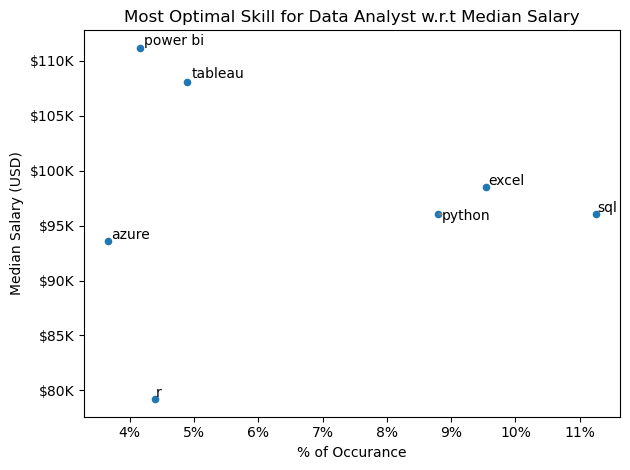

In [24]:
# PLOTTING

# FOR CLEARING THE CLUTTER
from adjustText import adjust_text
from matplotlib.ticker import FuncFormatter

df_top_skills.plot(kind='scatter',x='% of Occurance',y='median salary')
plt.xlabel('% of Occurance')
plt.ylabel('Median Salary (USD)')
plt.title('Most Optimal Skill for Data Analyst w.r.t Median Salary')

texts=[] # FOR CLEARING THE CLUTTER
for i, txt in enumerate(df_top_skills.index):
    texts.append(plt.text(df_top_skills['% of Occurance'].iloc[i],df_top_skills['median salary'].iloc[i],txt))
# THE ABOVE FOR LOOP IS BEING RUN FOR THE TEXT IDENTIFICATION OF PLOT

adjust_text(texts,arrowprops=dict(arrowstyle='->', color='grey', lw=1.5))   # ADJUST TEXT AND ADDS ARROW

# FOR CHANGING THIS AXES INTO 100K'S ETC
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos:f'${int(y/1000)}K'))

# TO ADD % IN X AXIS 
from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
 

plt.tight_layout()
plt.show()